In [33]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
file_path = r"https://raw.githubusercontent.com/ajayt0m/Ensemble-Techniques/main/Pistachio_28_Features_Dataset.xlsx"

pistachio_df = pd.read_excel(file_path)

In [12]:
X = pistachio_df.iloc[:,:-1]
y = pistachio_df.iloc[:,-1]

In [15]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=36)

In [17]:
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',  # for binary classification
    max_depth=8,
    learning_rate=0.1,
    n_estimators=100,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    seed=27
)

In [18]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [19]:
xgb_classifier.feature_importances_

array([0.01926647, 0.01378752, 0.01364742, 0.10425178, 0.01390624,
       0.01669069, 0.0102204 , 0.02383106, 0.01008629, 0.01909829,
       0.00804125, 0.06512163, 0.43017513, 0.00699294, 0.03232285,
       0.02694672, 0.0170339 , 0.01457055, 0.01138396, 0.02310717,
       0.0142415 , 0.01411708, 0.01799587, 0.01639916, 0.01946466,
       0.0091532 , 0.01322347, 0.01492275], dtype=float32)

In [20]:
pistachio_df.columns

Index(['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', 'Shapefactor_1', 'Shapefactor_2',
       'Shapefactor_3', 'Shapefactor_4', 'Mean_RR', 'Mean_RG', 'Mean_RB',
       'StdDev_RR', 'StdDev_RG', 'StdDev_RB', 'Skew_RR', 'Skew_RG', 'Skew_RB',
       'Kurtosis_RR', 'Kurtosis_RG', 'Kurtosis_RB', 'Class'],
      dtype='object')

In [21]:
y_pred = xgb_classifier.predict(X_test)

In [25]:
# Reverse label encoding for predictions
y_pred_original = label_encoder.inverse_transform(y_pred)
y_test_original = label_encoder.inverse_transform(y_test)

In [26]:
y_pred_original

array(['Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Siirt_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Kirmizi_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Kirmizi_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Siirt_Pistachio', 'Siirt_Pistachio',
       'Kirmizi_Pistachio', 'Siirt_Pistachio', 'Kirmizi_Pistachio',
       'Siirt_Pistachio', 'Kirmizi_Pistachio', 'Si

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_original,y_pred_original)

array([[314,  18],
       [ 25, 180]], dtype=int64)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_original,y_pred_original)

0.9199255121042831

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(xgb_classifier,X_train,y_train,cv=10)

array([0.93209877, 0.92546584, 0.8757764 , 0.9068323 , 0.89440994,
       0.94409938, 0.9068323 , 0.93167702, 0.90062112, 0.90062112])

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test_original,y_pred_original))

                   precision    recall  f1-score   support

Kirmizi_Pistachio       0.93      0.95      0.94       332
  Siirt_Pistachio       0.91      0.88      0.89       205

         accuracy                           0.92       537
        macro avg       0.92      0.91      0.91       537
     weighted avg       0.92      0.92      0.92       537



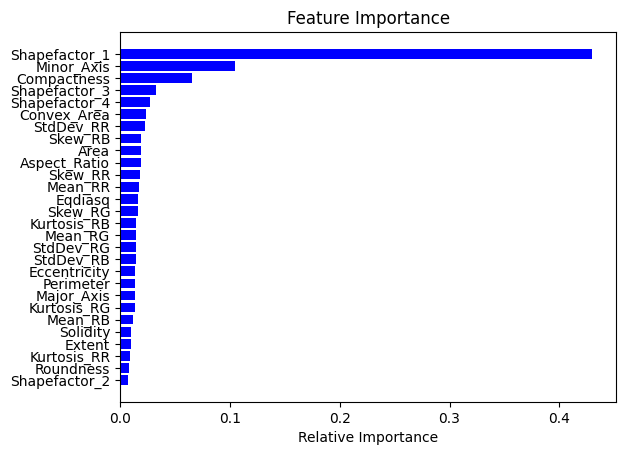

In [31]:
import numpy as np

features = pistachio_df.columns
importance = xgb_classifier.feature_importances_
indices = np.argsort(importance)

plt.title('Feature Importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [34]:
# Calculate AUC
y_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("\nAUC:", auc)


AUC: 0.9674551866000587


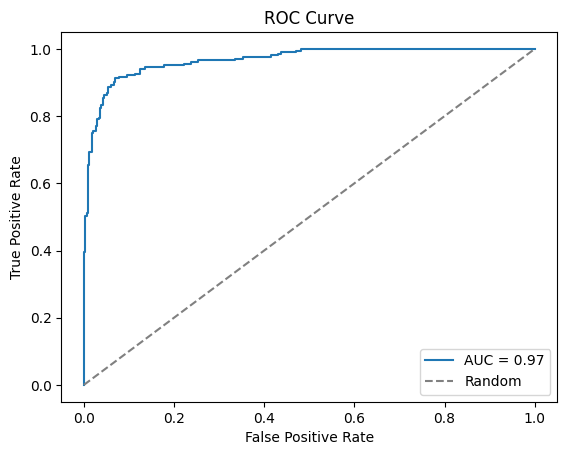

In [35]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()